# Zadanie 7

Dokonaj podziału obserwacji na podzbiór uczący (75% obserwacji, wybranych
w sposób losowy) oraz zbiór testowy (pozostałe).

In [1]:
library(data.table)
urine <- fread('http://theta.edu.pl/wp-content/uploads/2018/03/urine.csv')
#head(urine)

colnames(urine) <- c('col1', 'crystals', 'gravity', 'pH', 'osmo', 'cond', 'urea', 'calc')

nrow(urine)

Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message in fread("http://theta.edu.pl/wp-content/uploads/2018/03/urine.csv"):
"Found and resolved improper quoting in first 100 rows. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning."

[1] 79

 Dokonaj podziału obserwacji na podzbiór uczący (pierwsze 324 obserwacje)
oraz zbiór testowy (pozostałe).


In [2]:
# 75% uczący, 25% testowy

sample <- sample(c(TRUE, FALSE), nrow(urine), replace=TRUE, prob=c(0.75,0.25))
urine_train  <- urine[sample, ]
urine_test   <- urine[!sample, ]
#head(urine_train)
#head(urine_test)

ii) Dopasuj model regresji logistycznej bazując na podzbiorze uczącym, przyjmując za zmienną objaśnianą crystals

In [3]:
# usuwam zmienną 'col1', ponieważ jest to numer wiersza

model_glm = glm(crystals ~ . -col1, data = urine_train, family = binomial())
summary(model_glm)


Call:
glm(formula = crystals ~ . - col1, family = binomial(), data = urine_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5711  -0.6429  -0.2957   0.4242   2.6824  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept) -92.19268  197.19905  -0.468  0.64013   
gravity      90.06198  196.24437   0.459  0.64629   
pH           -0.18388    0.62497  -0.294  0.76859   
osmo          0.03061    0.02382   1.285  0.19885   
cond         -0.53000    0.33680  -1.574  0.11557   
urea         -0.03569    0.02191  -1.629  0.10331   
calc          0.84099    0.30619   2.747  0.00602 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 73.001  on 52  degrees of freedom
Residual deviance: 41.629  on 46  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 55.629

Number of Fisher Scoring iterations: 6


In [4]:
model_glm2 = glm(crystals ~ . -col1 -pH -osmo -cond -calc, data = urine_train, family = binomial())
summary(model_glm2)


Call:
glm(formula = crystals ~ . - col1 - pH - osmo - cond - calc, 
    family = binomial(), data = urine_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5065  -1.0279  -0.5334   0.9399   1.8387  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept) -185.30949   89.15487  -2.079   0.0377 *
gravity      182.51099   88.51110   2.062   0.0392 *
urea          -0.00273    0.00447  -0.611   0.5414  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 73.001  on 52  degrees of freedom
Residual deviance: 62.437  on 50  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 68.437

Number of Fisher Scoring iterations: 4


In [5]:
model_glm3 = glm(crystals ~ . -col1 -pH -osmo -cond -calc -urea, data = urine_train, family = binomial())
summary(model_glm3)

glm_model_final <- model_glm3


Call:
glm(formula = crystals ~ . - col1 - pH - osmo - cond - calc - 
    urea, family = binomial(), data = urine_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5092  -1.0253  -0.5606   0.9306   1.7781  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -142.97      51.48  -2.778  0.00548 **
gravity       140.22      50.54   2.774  0.00553 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 73.001  on 52  degrees of freedom
Residual deviance: 62.848  on 51  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 66.848

Number of Fisher Scoring iterations: 3


Skonstruuj klasyfikator w oparciu o próbę uczącą. Przedstaw na rysunku
klasyfikację dokonaną przez klasyfikator. Wyznacz błąd klasyfikacji na próbie testowej.

    predicted
true  0  1
   0 10  5
   1  3  6

[1] 33.33333

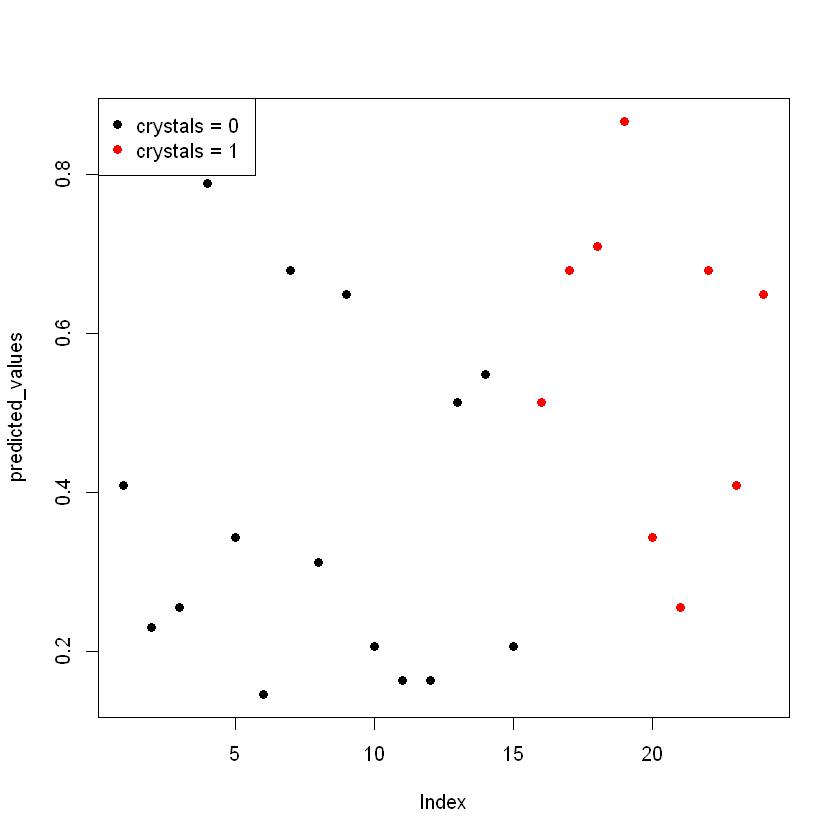

In [6]:
predicted_values = predict(glm_model_final, newdata = urine_test, type = 'response')

plot(predicted_values, pch = 19, col = urine_test$crystals + 1)
legend("topleft", c("crystals = 0", "crystals = 1"), pch = 19, col = c(1, 2))

# przekodowujemy prawdopodobieństwo na 0 i 1 (brak kryształów, obecność kryształów)
predicted_values[predicted_values < 0.5] = 0
predicted_values[predicted_values >= 0.5] = 1

(T = table(true = urine_test$crystals, predicted = predicted_values))  # robimy confusion matrix
(blad_predykcji = (1 - sum(diag(T)) / sum(T))*100)

 Skonstruuj klasyfikator w oparciu o metodę LDA bazując na próbie uczącej
oraz porównaj jego błąd klasyfikacji na próbie testowej z błędem klasyfikacji
klasyfikatora opartego na regresji logistycznej.

In [7]:
library(MASS)

model_LDA = lda(crystals ~ . -col1 -pH -osmo -cond -calc -urea, data = urine_train)  #tworzenie modelu

predicted_values_LDA = predict(model_LDA, newdata= urine_test)$class  # predykcja

(T_LDA = table(true = urine_test$crystals, predicted = predicted_values_LDA))  # tworzenie tabeli kontyngencji

(blad_predykcji_LDA = (1 - sum(diag(T_LDA)) / sum(T_LDA))*100) # obliczanie błędu predykcji

    predicted
true  0  1
   0 10  5
   1  3  6

[1] 33.33333

# zadanie 8

In [8]:
library(data.table)

cardio <- fread('http://theta.edu.pl/wp-content/uploads/2018/03/puls2.csv')


# zamiana 'Wysokie' na 1 i 'Niskie' na 0
# trzeba to zrobić, poniewaz glm() wymaga tego typu zmiennej objaśnianej
cardio$TetnoSpocz <- ifelse(cardio$TetnoSpocz =="Wysokie",1,0)

head(cardio)

TetnoSpocz,Palacz,Waga
0,1,51
0,1,52
0,1,57
0,1,59
0,1,60
0,1,66


Dokonaj podziału obserwacji na podzbiór uczący (75% obserwacji, wybranych
w sposób losowy) oraz zbiór testowy (pozostałe).

In [9]:
# 75% uczący, 25% testowy

sample <- sample(c(TRUE, FALSE), nrow(cardio), replace=TRUE, prob=c(0.75,0.25))
cardio_train  <- cardio[sample, ]
cardio_test   <- cardio[!sample, ]
#head(cardio_train)
#head(cardio_test)

Dopasuj model regresji logistycznej bazując na podzbiorze uczącym, przyjmując za zmienną objaśnianą TetnoSpocz.

In [10]:
mod_glm = glm(TetnoSpocz ~ ., data = cardio_train, family = binomial())
summary(mod_glm)


Call:
glm(formula = TetnoSpocz ~ ., family = binomial(), data = cardio_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2559  -0.7811  -0.5834   0.8213   2.6149  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.76996    2.28942  -3.394 0.000689 ***
Palacz       0.56406    0.59501   0.948 0.343131    
Waga         0.08119    0.02647   3.067 0.002162 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 72.183  on 66  degrees of freedom
AIC: 78.183

Number of Fisher Scoring iterations: 4


iii) Stosując krokową procedurę wyboru modelu zdecyduj, które zmienne
powinny pozostać w modelu

In [11]:
mod_glm2 = glm(TetnoSpocz ~ . -Palacz, data = cardio_train, family = binomial())
summary(mod_glm2)


Call:
glm(formula = TetnoSpocz ~ . - Palacz, family = binomial(), data = cardio_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1046  -0.8226  -0.5302   0.8885   2.5453  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.61489    2.30313  -3.306 0.000945 ***
Waga         0.08177    0.02674   3.058 0.002228 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 73.080  on 67  degrees of freedom
AIC: 77.08

Number of Fisher Scoring iterations: 4


iv) Dopasuj model regresji logistycznej bazując na podzbiorze uczącym,
uwzględniający interakcję pomiędzy zmiennymi objaśniającymi.

In [12]:
# używam modelu przed eliminacją zmiennej nieistotnej aby uwzględnić interakcję (po eliminacji niestotnej zmiennej...
# ... zostaje tylko jedna zmienna objaśniająca więc nie da się uwzględnić interakcji)

mod_glm_interact = glm(TetnoSpocz ~ Palacz + Waga + Palacz*Waga, data = cardio_train, family = binomial())
summary(mod_glm_interact)


Call:
glm(formula = TetnoSpocz ~ Palacz + Waga + Palacz * Waga, family = binomial(), 
    data = cardio_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6132  -0.8024  -0.6851   0.5158   1.9291  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -3.08690    2.46612  -1.252   0.2107  
Palacz      -17.91655    8.98441  -1.994   0.0461 *
Waga          0.02584    0.02925   0.883   0.3770  
Palacz:Waga   0.21578    0.10340   2.087   0.0369 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 63.682  on 65  degrees of freedom
AIC: 71.682

Number of Fisher Scoring iterations: 6


v) Przeanalizuj modele zawierające jako zmienne objaśniające następujące
zestawy zmiennych:
2
M1: Palacz, Waga, Palacz*Waga
M2: Waga, Palacz*Waga
M3: Palacz, Palacz*Waga
M4: Palacz*Waga
Który z tych modeli zawiera tylko istotne zmienne objaśniające?

In [13]:
m1 <- glm(TetnoSpocz ~ Palacz + Waga + Palacz*Waga, data = cardio_train, family = binomial())
m2 <- glm(TetnoSpocz ~ Waga + Palacz*Waga, data = cardio_train, family = binomial())
m3 <- glm(TetnoSpocz ~ Palacz + Palacz*Waga, data = cardio_train, family = binomial())
m4 <- glm(TetnoSpocz ~ Palacz*Waga, data = cardio_train, family = binomial())

In [14]:
# żaden z modeli nie zawiera samych istotnych zmiennych

summary(m1)
summary(m2)
summary(m3)
summary(m4)


Call:
glm(formula = TetnoSpocz ~ Palacz + Waga + Palacz * Waga, family = binomial(), 
    data = cardio_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6132  -0.8024  -0.6851   0.5158   1.9291  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -3.08690    2.46612  -1.252   0.2107  
Palacz      -17.91655    8.98441  -1.994   0.0461 *
Waga          0.02584    0.02925   0.883   0.3770  
Palacz:Waga   0.21578    0.10340   2.087   0.0369 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 63.682  on 65  degrees of freedom
AIC: 71.682

Number of Fisher Scoring iterations: 6



Call:
glm(formula = TetnoSpocz ~ Waga + Palacz * Waga, family = binomial(), 
    data = cardio_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6132  -0.8024  -0.6851   0.5158   1.9291  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -3.08690    2.46612  -1.252   0.2107  
Waga          0.02584    0.02925   0.883   0.3770  
Palacz      -17.91655    8.98441  -1.994   0.0461 *
Waga:Palacz   0.21578    0.10340   2.087   0.0369 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 63.682  on 65  degrees of freedom
AIC: 71.682

Number of Fisher Scoring iterations: 6



Call:
glm(formula = TetnoSpocz ~ Palacz + Palacz * Waga, family = binomial(), 
    data = cardio_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6132  -0.8024  -0.6851   0.5158   1.9291  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -3.08690    2.46612  -1.252   0.2107  
Palacz      -17.91655    8.98441  -1.994   0.0461 *
Waga          0.02584    0.02925   0.883   0.3770  
Palacz:Waga   0.21578    0.10340   2.087   0.0369 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 63.682  on 65  degrees of freedom
AIC: 71.682

Number of Fisher Scoring iterations: 6



Call:
glm(formula = TetnoSpocz ~ Palacz * Waga, family = binomial(), 
    data = cardio_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6132  -0.8024  -0.6851   0.5158   1.9291  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -3.08690    2.46612  -1.252   0.2107  
Palacz      -17.91655    8.98441  -1.994   0.0461 *
Waga          0.02584    0.02925   0.883   0.3770  
Palacz:Waga   0.21578    0.10340   2.087   0.0369 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.387  on 68  degrees of freedom
Residual deviance: 63.682  on 65  degrees of freedom
AIC: 71.682

Number of Fisher Scoring iterations: 6


vi) Dla pełnego modelu bez interakcji i modelu wskazanego w punkcie (v)
skonstruuj klasyfikatory w oparciu o próbę uczącą. Przedstaw na rysunku
klasyfikację dokonaną przez oba klasyfikatory. Wyznacz błąd klasyfikacji na
próbie testowej.

    predicted
true  0  1
   0 13  1
   1  4  5

[1] 21.73913

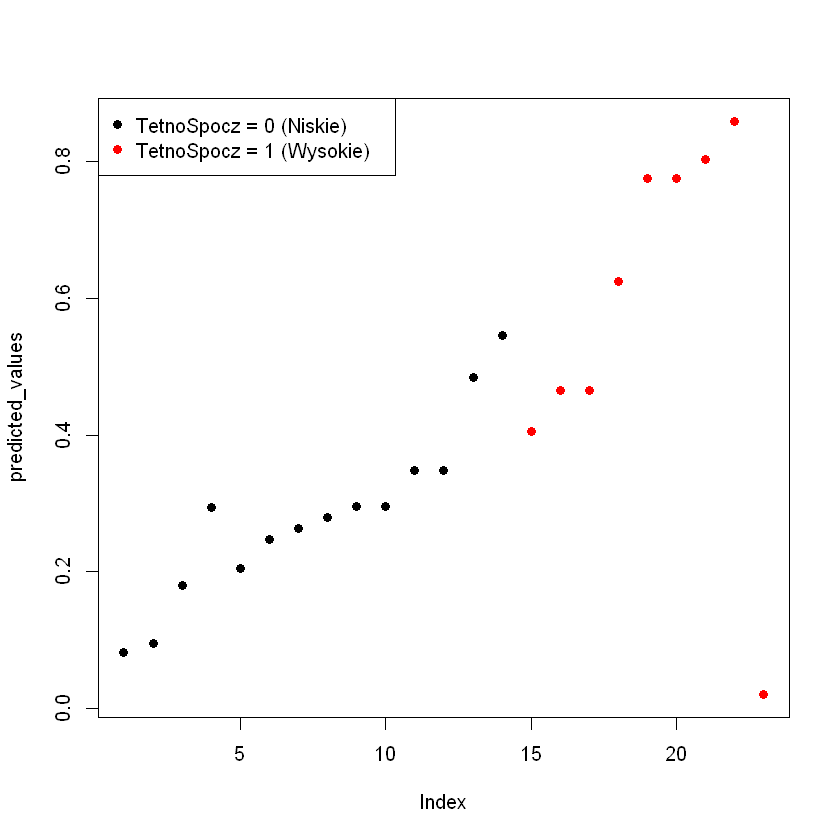

In [19]:
# żaden z modeli w punktu v) nie zawiera samych istotnych zmiennych
# więc skonstruuję klasyfikator jedynie dla modelu bez interakcji


# tworzenie klasyfikatora -------------------------------------------------------------------------------------------
mod_glm_no_interact = glm(TetnoSpocz ~ Palacz + Waga, data = cardio_train, family = binomial())
#summary(mod_glm_no_interact)

# klasyfikacja przez klasyfikator -----------------------------------------------------------------------------------
predicted_values = predict(mod_glm_no_interact, newdata = cardio_test, type = 'response')

plot(predicted_values, pch = 19, col = cardio_test$TetnoSpocz + 1)
legend("topleft", c("TetnoSpocz = 0 (Niskie)", "TetnoSpocz = 1 (Wysokie)"), pch = 19, col = c(1, 2))


# wyznaczanie błędu klasyfikacji -----------------------------------------------------------------------------------
predicted_values[predicted_values < 0.5] = 0   # konwersja ciągłej zmiennej na kategorycznej
predicted_values[predicted_values >= 0.5] = 1

(T = table(true = cardio_test$TetnoSpocz, predicted = predicted_values))  # tworzenie tabeli kontyngencji

(blad_predykcji = (1 - sum(diag(T)) / sum(T))*100) # obliczanie błędu predykcji

vii) Skonstruuj klasyfikatory w oparciu o metodę LDA bazując na próbie uczącej oraz porównaj ich błędy klasyfikacji na próbie testowej z błędami klasyfikacji klasyfikatorów opartych na regresji logistycznej. Skomentuj
uzyskane wyniki.

In [20]:
library(MASS)

model_LDA = lda(TetnoSpocz ~ Palacz + Waga, data = cardio_train)  #tworzenie modelu

predicted_values_LDA = predict(model_LDA, newdata= cardio_test)$class  # predykcja

(T_LDA = table(true = cardio_test$TetnoSpocz, predicted = predicted_values_LDA))  # tworzenie tabeli kontyngencji

(blad_predykcji_LDA = (1 - sum(diag(T_LDA)) / sum(T_LDA))*100) # obliczanie błędu predykcji


# Błąd predykcji jest taki sam jak w przypadku klasyfikatora opartego o regresję logistyczną
# Może to być spowodowane małym zbiorem danych

    predicted
true  0  1
   0 13  1
   1  4  5

[1] 21.73913